# ccat_holo

'ccat_holo' is a python package which is designed to analyze the holographic measurement data for the Fred Young Sub-mm Telescope. The telescope uses a special 'Crossed-Dragone' optics design, which consists of two 6-m reflectors. Its two reflectors both have to be aligned to be better than 10um (goal of < 7um). 

The new **'Multi-map'** Holography method has been developed for measuring and discriminating the surface errors of the two reflectors of FYST by taking 5 different beam maps. The software was developed for the data analysis which can convert the 5 measured beam maps into 'Two' surface error maps.

- [Installation](#Installation)
- [FYST Geometry](#FYST Geometry)
- [](#)

## Installation
**This package just works with python3.**

Following packages are required:
1. numpy v1.21
2. scipy v1.7
3. pytorch 1.12
4. transforms3d v0.4.1
5. h5py v3.6.0
6. pyvista

You can install these packages using the command:

'pip install -r requirements'

When you have all required packages, you can clone or download the 'ccat_holo' repository from github or uni-koeln gitlab. 

```shell
git clone https://github.com/XiaodongRencologne/CCAT_holo_V1.git
or
git clone https://github.com/XiaodongRencologne/CCAT_holo_V1.git
```




## FYST Geometry
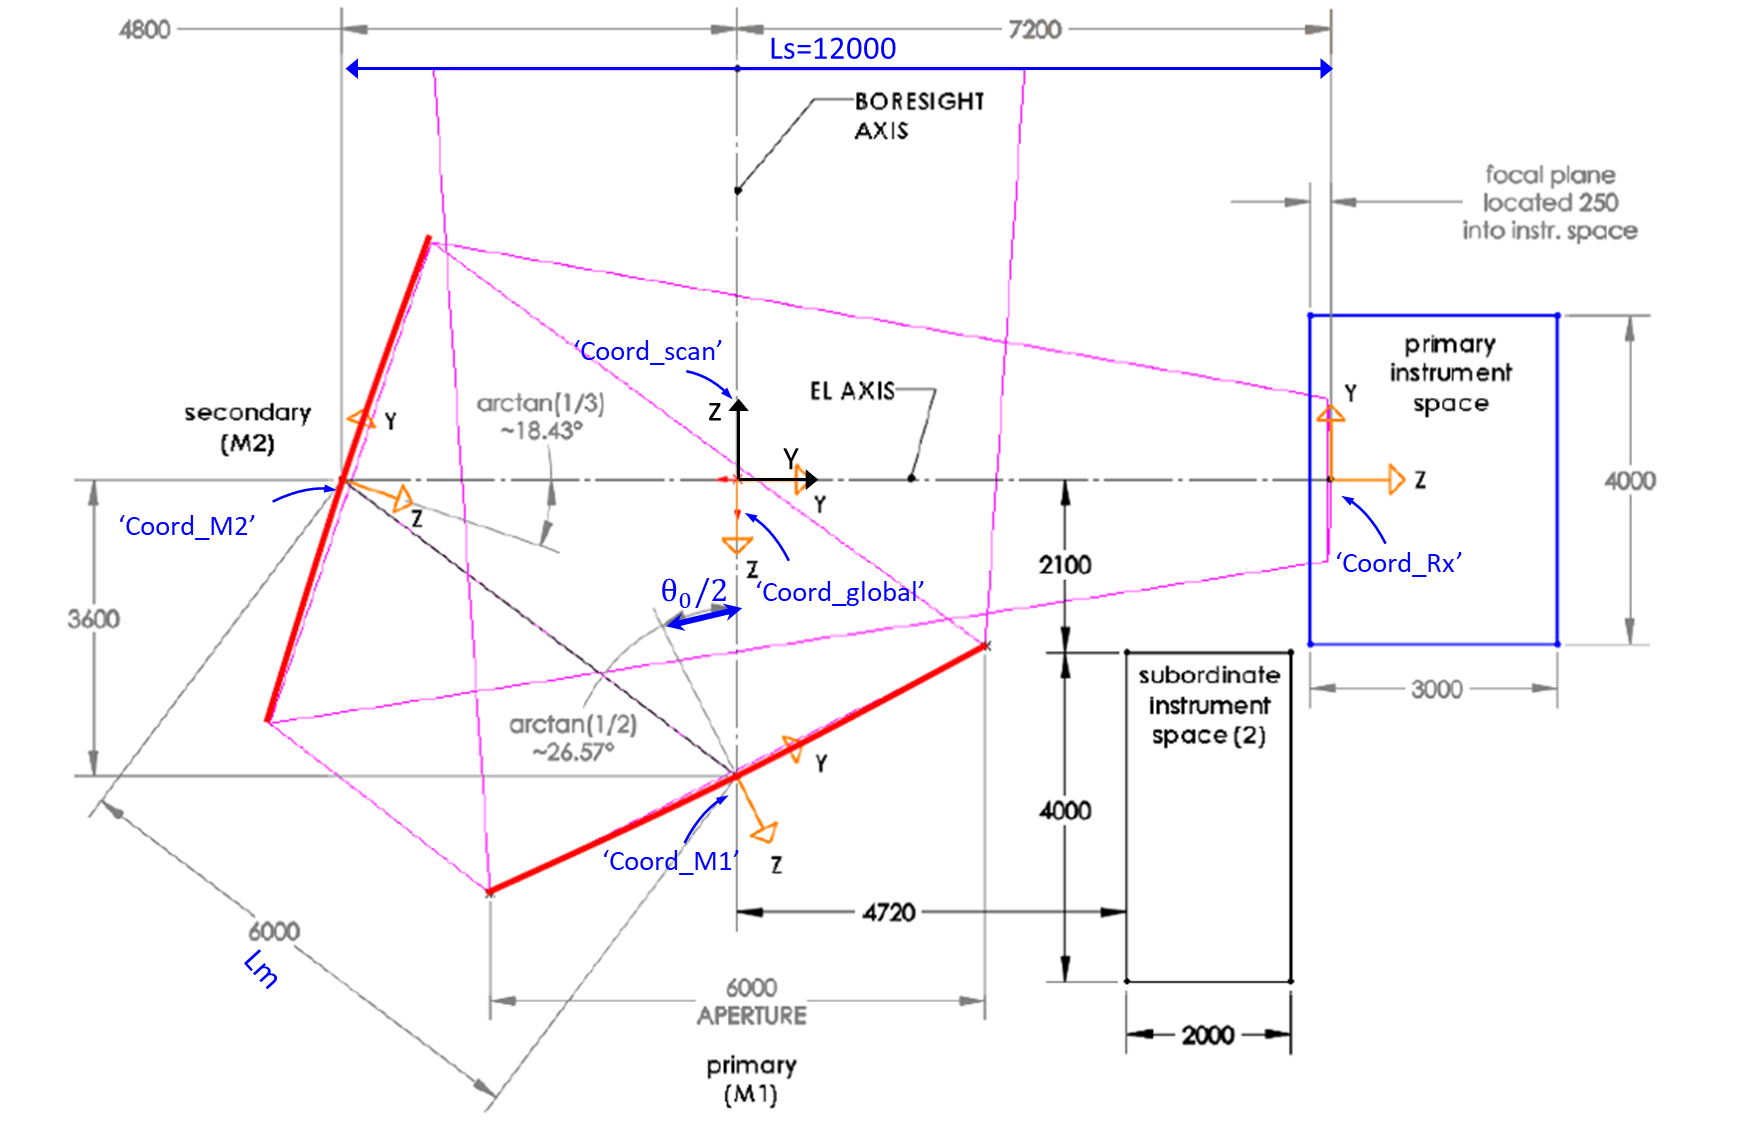

In [ ]:
from ccat_holo.Pyccat import CCAT_holo
import time
import torch as T

In [2]:
# 1. Model folder
Model_folder='CCAT_model'
# 2. Configuration of the Holography system
holo_setup={'Rx1':([0,0,600],'scan/on-axis.txt'), 
            'Rx2':([400,400,600],'scan/400_400_600.txt'),
            'Rx3':([400,-400,600],'scan/400_-400_600.txt'),
            'Rx4':([-400,400,600],'scan/-400_400_600.txt'),
            'Rx5':([-400,-400,600],'scan/-400_-400_600.txt')
            }
# Define 5 receiver positions in the 'Coord_Rx' system, e.g [+/-400,+/-400,600]
# and their field points that are stored in file 'scan/400_400_600.txt'. The field
# points of the measured beam maps are from the read out of the telescope coders.
#####################
# 3. Output_folder is the folder used to store the intermediate data of the first
#    beam calculation and the analysing results.
Output_folder='Analysis1'

# 4. Create the FYST holography Model and check the telescope model and 
# holographic setup in the 3D view.
Model=CCAT_holo(Model_folder,Output_folder,holo_conf=holo_setup)
#Model.view()

#Model.view_Rx(Rx=['Rx1'])

FYST telescope model has been created!!
[-1.2490457723982542, 0, 0] [0, -4799.999999999999, 0]


Widget(value="<iframe src='http://localhost:49793/index.html?ui=P_0x2006fa87e80_0&reconnect=auto' style='width…

In [ ]:
# 5. Running the time-consuming first beam calculation.
Model.First_Beam_cal()
''' We only need to run this calculation in the beginning
 of the data analysis. All the setup defined in 'holo_config'
 will be computed. The intermediate computed data will be
 stored in the directory 'output_folder', here is 'Analysis1'.
'''


In [4]:
# 6. Make the farward beam calculation function, (Model.FF), with using
# the data produced by the First beam calculations. Here, we can use the movements
# of the panel adjusters or coefficients of Zernike polynomial as the fitting paramters.
# If fitting_param is 'zernike', the surface deviations will be described by 
# the summation of zernike polynimals, and the maximum zernike order is 7th.
Model.mk_FF(fitting_param='panel adjusters',
                  Device=T.device('cpu'),
                  Z_order=7)

# The function also supports the GPU acceleration by setting the 'Device' to 
# 'T.device('cuda:0')'.

# Model.FF(adjusters, Para_Amp, Para_phase)


In [ ]:
# 7. Start